In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df['sex'].unique()

array([2, 1, 3])

## **EDA**

***Dataset Details***

*   age - Years
*   sex - Categorical (1,2,3)
*   height - cm
*   weight - Kg
*   ap_lo - Systolic Blood Pressure
*   ap_hi - Diastolic Blood Pressure
*   cholesterol - Categorical (1-Normal, 2- Above Normal, 3- Well Above Normal)
*   gluc - Glucose - Categorical (1-Normal, 2- Above Normal, 3- Well Above Normal)
*   smoke - Smoking - Binary
*   alco - Alcohol - Binary
*   active - Physical - Binary
*   cardio - Cardiovascular Disease - Binary



In [ ]:
df.shape

(70000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## **DATA CLEANING**

In [ ]:
#NO NULL VALUES IN DATA
df.isnull().sum()

id             0
age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### **Filter out the following patient segments that represent incorrect data:**

> age in days

> diastolic pressure is higher than systolic

> height is less than the 2.5th percentile

> height is more than the 97.5th percentile

> weight is less than the 2.5th percentile

> weight is more than the 97.5th percentile











### ***Age in days in dataset - Convert it to years***


In [ ]:
df['age'].unique()

array([18393, 20228, 18857, ..., 14925, 17727, 17926])

In [ ]:
#CONVERT AGE IN DAYS TO YEARS
df['age'] = (df['age']/365.24).round(0).astype(int)
df['age']

0        50
1        55
2        52
3        48
4        48
         ..
69995    53
69996    62
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

### ***Keep the data with Diastolic Pressure less than or equal to Systolic Pressure***

Given - Diastolic Pressure Greater than Systolic Pressure is incorrect patient data

In [ ]:
#Correct with systolic pressure greater than diastolic pressure
df[df['ap_lo'] <= df['ap_hi']]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df = df[df['ap_lo'] <= df['ap_hi']]

### ***Keep the data with Height greater than or equal to 2.5 percentile***

Given - height is less than the 2.5th percentile is incorrect

In [ ]:
df['height'].quantile(0.025)

150.0

In [ ]:
df[df['height'] >= df['height'].quantile(0.025)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df = df[df['height'] >= df['height'].quantile(0.025)]

### **Keep the data with Height is less than or equal to 97.5 percentile**

Given - height is more than the 97.5th percentile is incorrect

In [ ]:
df['height'].quantile(0.975)

180.0

In [ ]:
df[df['height'] <= df['height'].quantile(0.975)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df = df[df['height'] <= df['height'].quantile(0.975)]

### ***Keep the data with weight greater than 2.5% of data and less than 97.5% of data***

Given - weight is less than the 2.5th percentile and
weight is more than the 97.5th percentile is incorrect

In [ ]:
df['weight'].quantile(0.025)

52.0

In [ ]:
df[df['weight'] >= df['weight'].quantile(0.025)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df = df[df['weight'] >= df['weight'].quantile(0.025)]

In [ ]:
df['weight'].quantile(0.975)

106.0

In [ ]:
df[df['weight'] <= df['weight'].quantile(0.975)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,54,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df = df[df['weight'] <= df['weight'].quantile(0.975)]

## **Data Processing**

### ***Normalize the data by making 0 always good and 1 always bad***

For cholesterol and gluc - 1 (Normal), 2(Above Normal), 3(Well Above Normal)

Replace 1 with 0 and more than 1 with 1

In [ ]:
df['gluc'] = df['gluc'].replace(1,0)
df['gluc'] = df['gluc'].replace([2,3],1)

In [ ]:
df['gluc'].unique()

array([0, 1])

In [ ]:
df['cholesterol'] = df['cholesterol'].replace(1,0)
df['cholesterol'] = df['cholesterol'].replace([2,3],1)


In [ ]:
df['cholesterol'].unique()

array([0, 1])

### ***Add Overweight Column***

BMI = Weight in kg / Squared(Height in meters)

BMI > 25 - Overweight **1**

BMI <= 25 - Not Overweight **0**

In [ ]:
def bmi_calculator(w,h):
  bmi = w/(h/100)**2
  return bmi

In [ ]:
print(bmi_calculator(df['weight'], df['height']).round())

0        22.0
1        35.0
2        24.0
3        29.0
4        23.0
         ... 
69993    24.0
69994    29.0
69995    27.0
69998    27.0
69999    25.0
Length: 62784, dtype: float64


In [ ]:
#Add bmi and overweight column using lambda function
df['overweight'] = df.apply(lambda x: 1 if bmi_calculator(x['weight'], x['height']).round() > 25 else 0, axis=1)

In [ ]:
#Check for BMI > 25 - Overweight 1 and Not overweight 0
df['overweight'].value_counts()

1    36173
0    26611
Name: overweight, dtype: int64

# **Data Visualization**

## ***Plot the categorical data using Seaborn***

### **Transform data into long format**

In [ ]:
#Convert data from wide to long format
df_melted = pd.melt(df, id_vars = 'cardio', value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])

In [ ]:
grouped_df = df_melted.groupby(['cardio','variable','value']).size().reset_index(name='total')
grouped_df

,cardio,variable,value,total
0,0,active,0,5786
1,0,active,1,26013
2,0,alco,0,30051
3,0,alco,1,1748
4,0,cholesterol,0,26737
5,0,cholesterol,1,5062
6,0,gluc,0,28109
7,0,gluc,1,3690
8,0,overweight,0,15720
9,0,overweight,1,16079


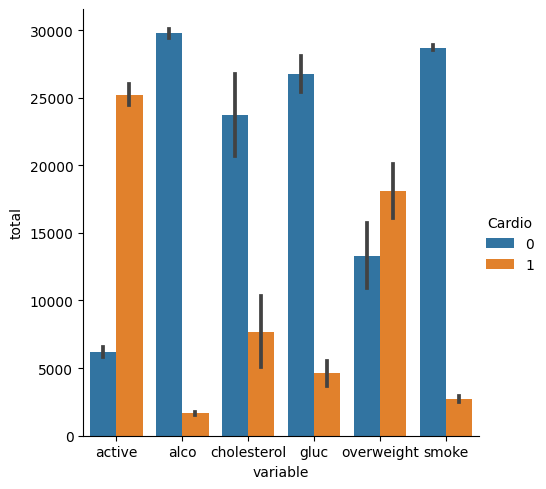

In [ ]:
plot = sns.catplot(data = grouped_df,
                   x = 'variable', y = 'total',
                   hue='value',
                   kind='bar')
plot._legend.set_title('Cardio')


## ***Plot the correlation heatmap using Seaborn***

In [ ]:
corr = df.corr()

<Axes: >

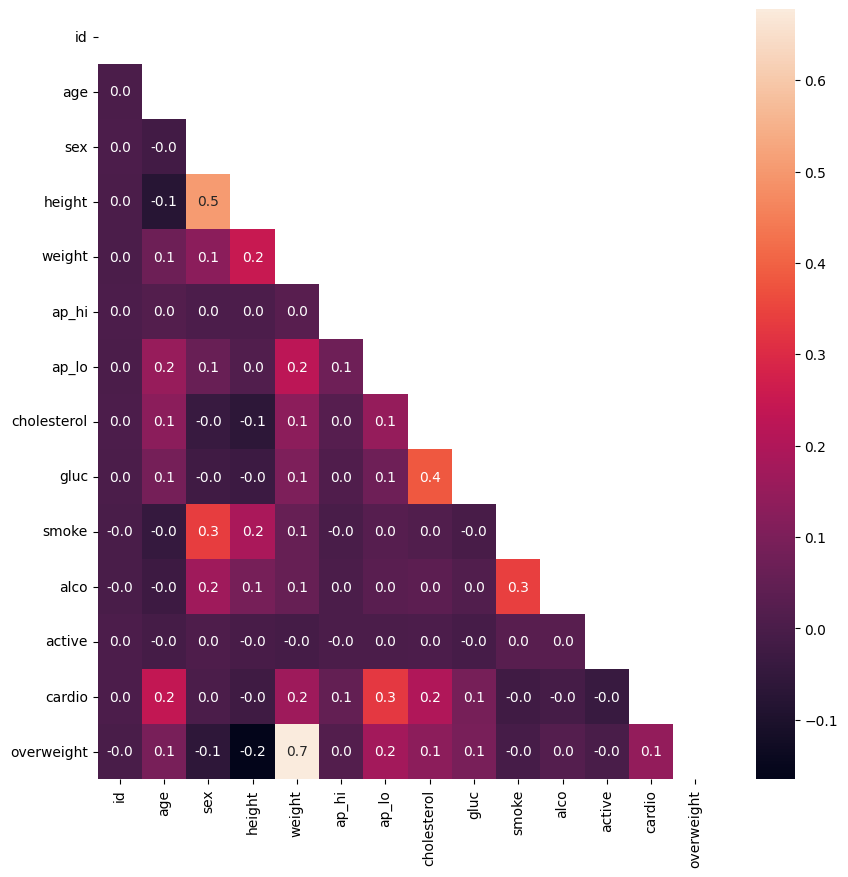

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True,fmt='.1f',
            mask=np.triu(np.ones_like(df.corr(), dtype=bool)))